In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [34]:
aigen2_oneshot = pd.read_csv('summary_aigen2_oneshot.csv')


df_aigen2_oneshot = aigen2_oneshot[['APIs', 'F1 Score']]
df_aigen2_oneshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.98
1,CREATE_CALENDAR_EVENT,0.67
2,CREATE_REMINDER,0.97
3,GENERATE_IMAGE,0.82
4,GET_CALENDAR_EVENTS,0.85
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,1.00
8,GET_WEATHER,1.00
9,NOT_AVAILABLE,0.70


In [35]:
aigen5_oneshot = pd.read_csv('summary_aigen5_oneshot.csv')
df_aigen5_oneshot = aigen5_oneshot[['APIs', 'F1 Score']]
df_aigen5_oneshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.98
1,CREATE_CALENDAR_EVENT,0.55
2,CREATE_REMINDER,0.99
3,GENERATE_IMAGE,0.98
4,GET_CALENDAR_EVENTS,0.71
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,0.40
8,GET_WEATHER,0.97
9,NOT_AVAILABLE,0.73


In [36]:
aigen5_zeroshot = pd.read_csv('summary_aigen5_zeroshot.csv')
df_aigen5_zeroshot = aigen5_zeroshot[['APIs', 'F1 Score']]
df_aigen5_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.98
1,CREATE_CALENDAR_EVENT,0.62
2,CREATE_REMINDER,0.99
3,GENERATE_IMAGE,0.94
4,GET_CALENDAR_EVENTS,0.81
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,0.99
7,GET_NEWS,0.84
8,GET_WEATHER,0.98
9,NOT_AVAILABLE,0.93


In [37]:
aigen13_zeroshot = pd.read_csv('summary_aigen13_zeroshot.csv')
df_aigen13_zeroshot = aigen13_zeroshot[['APIs', 'F1 Score']]
df_aigen13_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,1.00
1,CREATE_CALENDAR_EVENT,0.57
2,CREATE_REMINDER,1.00
3,GENERATE_IMAGE,0.98
4,GET_CALENDAR_EVENTS,0.88
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,0.89
8,GET_WEATHER,1.00
9,NOT_AVAILABLE,0.77


In [38]:
autogpt_zeroshot = pd.read_csv('summary_autogpt_zeroshot.csv')
df_autogpt_zeroshot = autogpt_zeroshot[['APIs', 'F1 Score']]
df_autogpt_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.99
1,CREATE_CALENDAR_EVENT,0.54
2,CREATE_REMINDER,0.97
3,GENERATE_IMAGE,0.99
4,GET_CALENDAR_EVENTS,0.71
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,1.00
8,GET_WEATHER,0.91
9,NOT_AVAILABLE,0.58


In [39]:
sparksofagi_zeroshot = pd.read_csv('summary_sparksofagi_zeroshot.csv')
df_sparksofagi_zeroshot = sparksofagi_zeroshot[['APIs', 'F1 Score']]
df_sparksofagi_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.95
1,CREATE_CALENDAR_EVENT,0.78
2,CREATE_REMINDER,0.94
3,GENERATE_IMAGE,1.00
4,GET_CALENDAR_EVENTS,0.79
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,1.00
8,GET_WEATHER,0.97
9,NOT_AVAILABLE,0.72


In [40]:
# Read CSV files and extract relevant columns and set 'user_prompt' as index
def read_and_process(filename, model_name):
    df = pd.read_csv(filename)[['APIs', 'F1 Score']]
    df.set_index('APIs', inplace=True)
    df.columns = [model_name]
    return df

In [41]:
aigen13_zeroshot_df = read_and_process('summary_aigen13_zeroshot.csv', 'aigen13_zeroshot')
aigen2_oneshot_df = read_and_process('summary_aigen2_oneshot.csv', 'aigen2_oneshot')
aigen2_zeroshot_df = read_and_process('summary_aigen2_zeroshot.csv', 'aigen2_zeroshot')
sparksofagi_zeroshot_df = read_and_process('summary_sparksofagi_zeroshot.csv', 'sparksofagi_zeroshot')
aigen5_zeroshot_df = read_and_process('summary_aigen5_zeroshot.csv', 'aigen5_zeroshot')
aigen5_oneshot_df = read_and_process('summary_aigen5_oneshot.csv', 'aigen5_oneshot')
aigen13_zeroshot_df = read_and_process('summary_aigen13_zeroshot.csv', 'aigen13_zeroshot')
autogpt_zeroshot_df = read_and_process('summary_autogpt_zeroshot.csv', 'autogpt_zeroshot')  

In [42]:
# Concatenate DataFrames side by side
df = pd.concat([aigen13_zeroshot_df, sparksofagi_zeroshot_df, aigen5_zeroshot_df, aigen2_oneshot_df, autogpt_zeroshot_df, aigen2_zeroshot_df, aigen5_oneshot_df], axis=1)
final_df_transposed = df.T

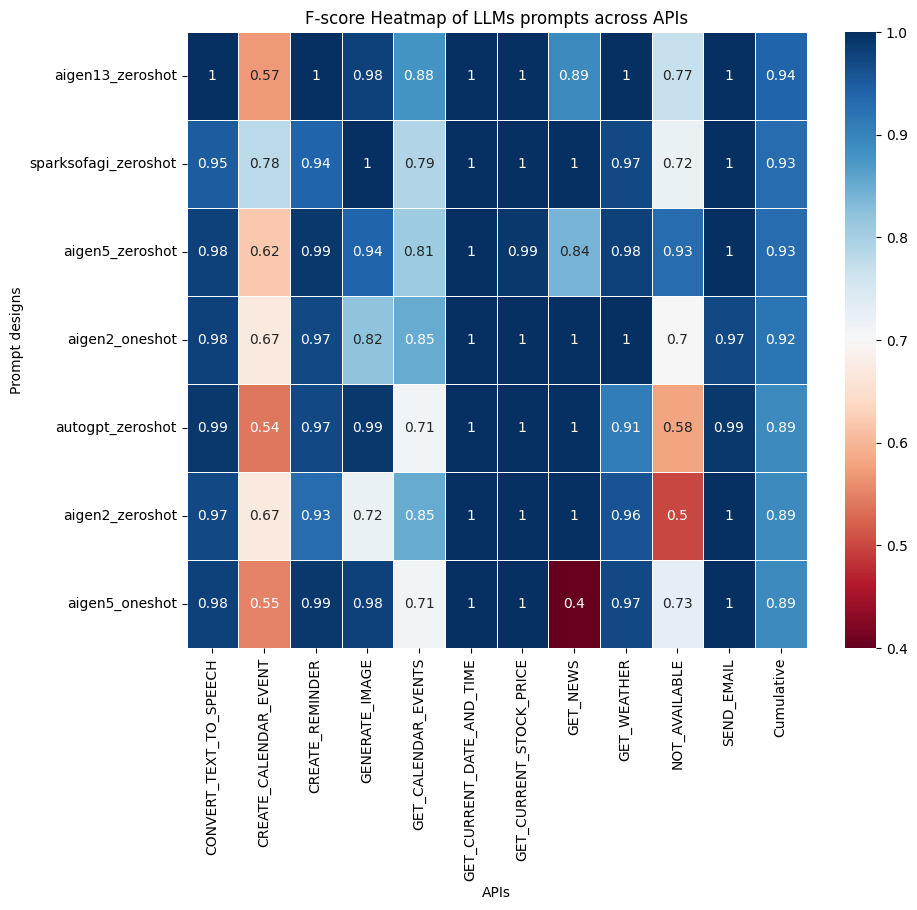

In [43]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_df_transposed, annot=True, cmap="RdBu", linewidths=0.5)
ax.set_ylabel('Prompt designs')
ax.set_xlabel('APIs')
plt.title('F-score Heatmap of LLMs prompts across APIs')
plt.show()